<div class="well well-lg"><h1>Comparison of modified methods to calculate sea level contributions on regional grid</h1></div>

This notebook calulates sea-level contributions from an extended ISMIP6 projections, 
- using different methods (defined in slc)
- for the southpolar ISMIP region

contact: 
- Torsten Albrecht (torsten.albrecht@pik-potsdam.de) | Potsdam Institute for Climate Impact Research (PIK) and 
- Heio Goelzer (HEIG@norceresearch.no) | Norwegian Research Centre (NORCE), Affiliated Bjerknes Centre for Climate Research

<div class="alert alert-info">
CC-BY: Creative Commons Attribution 4.0 International  
</div>

In [1]:
import matplotlib.pylab as plt
from matplotlib import cm, colors
import netCDF4 as nc
import numpy as np
import os, glob

# SL methods
from slc import slc_vaf
from slc import slc_G2020_publ
from slc import slc_G2020
from slc import slc_A2020

# Get constants
from slc import sl_constants as c

# Plotting
from slc import plotting

In [2]:
# Main data path
datapath = "/data/projects/ismip7sealevel/files"


In [3]:
# Relative reference frame for Vaf and G2020
def get_slc_estimates(H0,H,B0,B,S0,S,zn0,zn,A):

    slc_af = slc_vaf.get_slc_vaf_HBA(H0,H,B0,B,A)
    slc_a2020 = slc_A2020.get_slc_A2020(H0,H,B0,B,S0,S,A)
    slc_g2020 = slc_G2020_publ.get_slc_G2020(H0,H,B0,B,zn0,zn,A)
    slc_diff_ag  = slc_a2020-slc_g2020
    slc_diff_va  = slc_af-slc_a2020
    slc_diff_vg  = slc_af-slc_g2020

    print('sea level change due to VAF:\t\t\t',np.around(slc_af,decimals=4))
    print('sea level change due to A2020:\t\t\t',np.around(slc_a2020,decimals=4))
    print('sea level change due to G2020:\t\t\t',np.around(slc_g2020,decimals=4))
    print('difference vaf-a2020:\t\t\t',np.around(slc_diff_va,decimals=4))
    print('difference vaf-g2020:\t\t\t',np.around(slc_diff_vg,decimals=4))
    print('difference a2020-g2020:\t\t\t',np.around(slc_diff_ag,decimals=4))
    
    return (slc_af,slc_g2020,slc_a2020,slc_diff_ag,slc_diff_vg)


# Absolute reference frame for Vaf and G2020
def get_slc_estimates_abs(H0,H,B0,B,S0,S,A):

    slc_af = slc_vaf.get_slc_vaf(H0,H,B0,B,S0,S,A)
    slc_a2020 = slc_A2020.get_slc_A2020(H0,H,B0,B,S0,S,A)
    slc_g2020 = slc_G2020.get_slc_G2020(H0,H,B0,B,A)
    slc_diff_ag  = slc_a2020-slc_g2020
    slc_diff_vg  = slc_af-slc_g2020
    slc_diff_va  = slc_af-slc_a2020

    print('sea level change due to VAF:\t\t\t',np.around(slc_af,decimals=4))
    print('sea level change due to A2020:\t\t\t',np.around(slc_a2020,decimals=4))
    print('sea level change due to G2020:\t\t\t',np.around(slc_g2020,decimals=4))
    print('difference vaf-a2020:\t\t\t',np.around(slc_diff_va,decimals=4))
    print('difference vaf-g2020:\t\t\t',np.around(slc_diff_vg,decimals=4))
    print('difference a2020-g2020:\t\t\t',np.around(slc_diff_ag,decimals=4))
    
    return (slc_af,slc_g2020,slc_a2020,slc_diff_ag,slc_diff_vg,slc_diff_va)


In [4]:
# ISMIP6 2300 contribution by PIK_PISM

fref =datapath+"/ismip2300-coupled/pism_vilma_8km_1850.nc"
#
f0 =datapath+"/ismip2300-coupled/pism_vilma_8km_1850.nc"
#f0 =datapath+"/ismip2300-coupled/pism_vilma_8km_2000.nc"
#f0 =datapath+"/ismip2300-coupled/pism_vilma_8km_2100.nc"
#f0 =datapath+"/ismip2300-coupled/pism_vilma_8km_2200.nc"
#
#f =datapath+"/ismip2300-coupled/pism_vilma_8km_2200.nc"
f =datapath+"/ismip2300-coupled/pism_vilma_8km_2300.nc"

idat = nc.Dataset(fref, 'r')
topg_ref_PISM  = idat.variables["topg"][0,:]
rsl_ref_PISM  = idat.variables["rslc"][0,:]
x_ref_PISM  = idat.variables["x"][:]
y_ref_PISM  = idat.variables["y"][:]
idat.close()
vx, vy = np.meshgrid(x_ref_PISM, y_ref_PISM, indexing='xy') #2d\n

idat = nc.Dataset(f0, 'r')
lithk0_PISM  = idat.variables["lithk"][0,:]
topg0_PISM  = idat.variables["topg"][0,:]
rsl0_PISM  = idat.variables["rslc"][0,:]
ur0_PISM  = idat.variables["ur"][0,:]
idat.close()
H0 = lithk0_PISM
B0 = topg_ref_PISM + ur0_PISM
S0 = B0 - topg0_PISM
Zn0 = -S0

idat = nc.Dataset(f, 'r')
lithk_PISM  = idat.variables["lithk"][0,:]
topg_PISM  = idat.variables["topg"][0,:]
rsl_PISM  = idat.variables["rslc"][0,:]
ur_PISM  = idat.variables["ur"][0,:]
idat.close()
# in PISM topg=topg_ref-rsl; to determine changes in B and S separately use ur
# B=topg_ref_PISM+ur_PISM
# S=
H = lithk_PISM
B = topg_ref_PISM + ur_PISM
S = B - topg_PISM
Zn = -S

# compare changes to initial and reference state in lower left corner
print(topg_PISM[0,0]-topg0_PISM[0,0], rsl_PISM[0,0]-rsl0_PISM[0,0], B[0,0]-B0[0,0], S[0,0])
print(topg_PISM[0,0]-topg_ref_PISM[0,0], rsl_PISM[0,0]-rsl_ref_PISM[0,0], B[0,0]-B0[0,0], S[0,0])
print(B[0,0]-B0[0,0], S[0,0]-S0[0,0], S[0,0]-S0[0,0]-(B[0,0]-B0[0,0] ), rsl_PISM[0,0]-rsl0_PISM[0,0])


-1.6283013709989973 1.6283013709989973 0.541398844509331 2.1697002155083283
-1.6283013709989973 1.6283013709989973 0.541398844509331 2.1697002155083283
0.541398844509331 2.1697002155083283 1.6283013709989973 1.6283013709989973


In [5]:
# grid generic info

picafile = datapath+"/ismip2300-coupled/pism_8km_cellarea.nc"
vdat = nc.Dataset(picafile, 'r')
ca = vdat.variables["cell_area"][:]
vdat.close()

A = ca

print('ice volume 0', np.sum(H0*A),'m3')
print('ice volume 1', np.sum(H*A),'m3')


ice volume 0 2.63672314537379e+16 m3
ice volume 1 2.4468539261845704e+16 m3


In [6]:
# Compare reference frame

##print('# # # ')
#print('PISM-VILMA rel:')
#get_slc_estimates(H0,H,B0,B,0,0,0,0,A)

##print('# # # ')
#print('PISM-VILMA abs:')
#get_slc_estimates_abs(H0,H,B0,B,0,0,A)
#print('# Same results for absolute and relative formulation of Vaf and G2020 # ')

# Compare methods
print('# PISM grid # \n')
print('PISM surface: ', np.round(np.sum(A)*1e-12,decimals=4),'million km2\n')
print('Vtot  :\t\t\t',np.around(slc_vaf.get_slc_vtot(H0,H,A),decimals=4))
print('Vgr  :\t\t\t',np.around(slc_vaf.get_slc_vgr(H0,H,B0,B,S0,S,A),decimals=4))
print('Vaf  :\t\t\t',np.around(slc_vaf.get_slc_vaf(H0,H,B0,B,S0,S,A),decimals=4),'\n')
print('A2020:\t\t\t',np.around(slc_A2020.get_slc_A2020(H0,H,B0,B,S0,S,A),decimals=4))
print('G2020:\t\t\t',np.around(slc_G2020.get_slc_G2020(H0,H,B0,B,A),decimals=4))


# PISM grid # 

PISM surface:  36.0287 million km2

Vtot  :			 5.3792
Vgr  :			 4.6947
Vaf  :			 2.1093 

A2020:			 2.2123
G2020:			 2.3055


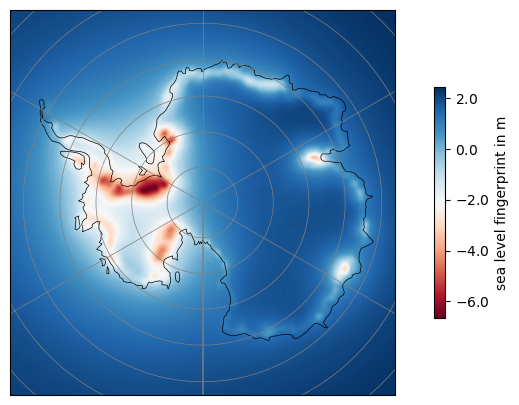

In [7]:
plotting.plot_regional(S-S0, vx, vy, 'sea level fingerprint in m')

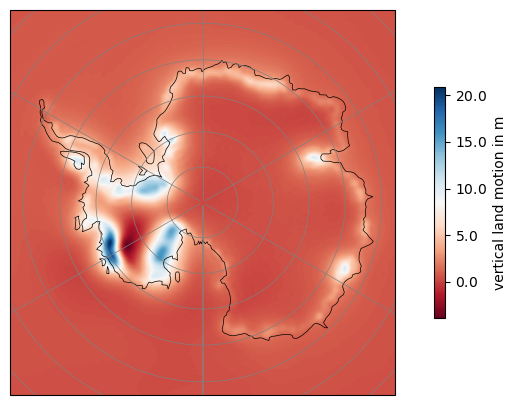

In [8]:
plotting.plot_regional(B-B0, vx, vy, 'vertical land motion in m')

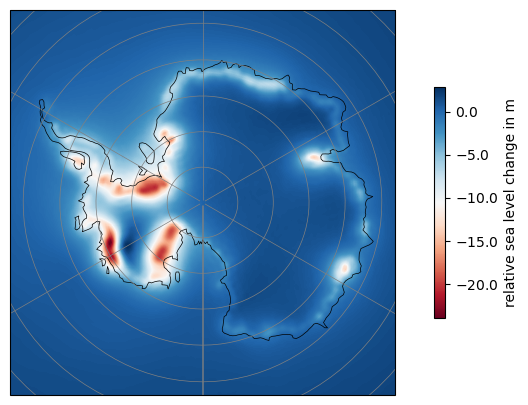

In [9]:
plotting.plot_regional(rsl_PISM-rsl0_PISM, vx, vy, 'relative sea level change in m')